## Presprocesamiento de los datos

In [1]:
import os
import pandas as pd

In [2]:
# Cambiar directorio
os.chdir("..")

In [3]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("data/raw/churn.csv")


In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Nos deshacemos de las columnas que no contribuyen en mucho
data = data.drop(data.columns[0:3], axis=1)

In [ ]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Convertimos los datos en formato categorico, para más info: shorturl.at/y0269
column_equivalence = {}
features = list(data.columns)
# Iteramos sobre los tipos de datos de cada columna, convirtiéndolos a string para poder compararlos
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    # Si la columna es de tipo 'object' (categoría o texto)
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())     # Rellenamos valores nulos con el valor más frecuente (moda)
        categorical_column = data[data.columns[i]].astype("category")                          # Convertimos la columna a tipo 'category' (categoría de pandas)
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))        # Diccionario que asocia índices numéricos a cada categoría
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())      # Invertimos el diccionario
        data[data.columns[i]] = categorical_column.cat.codes                                   # Reemplazamos las categorías por sus códigos numéricos en la columna
    # Si la columna no es de tipo 'object' (numérica u otro)
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())   # Rellenamos valores nulos con la mediana de la columna

In [ ]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

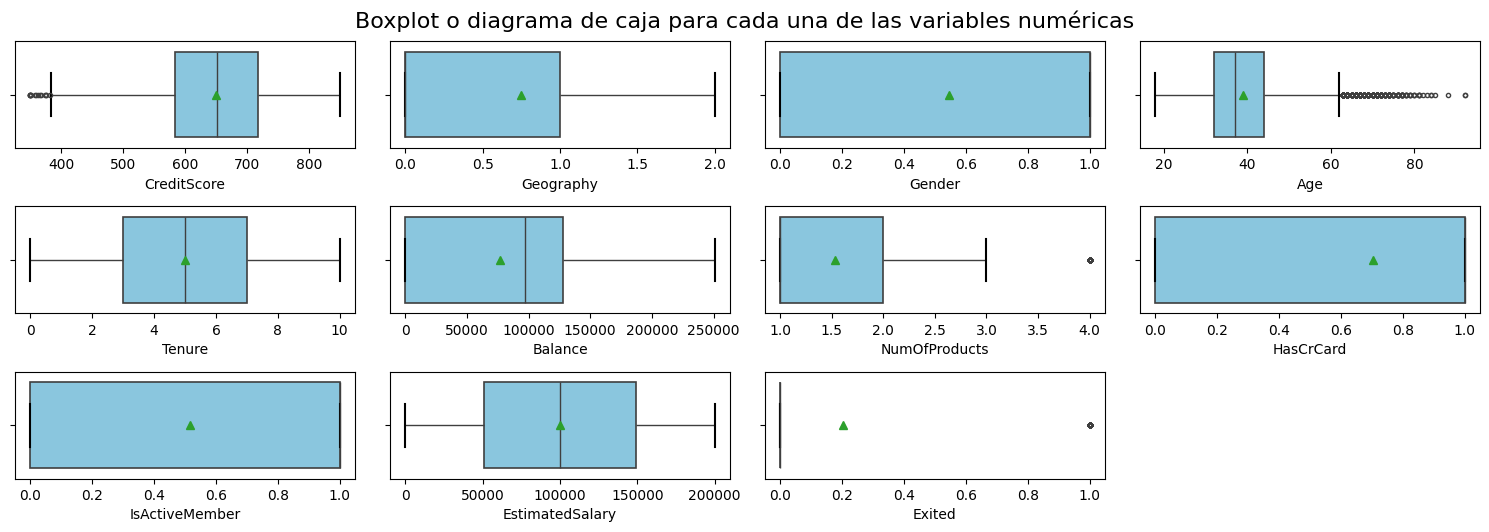

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data.select_dtypes(include=np.number)# Selecciona todas las columnas numéricas
num_rows = 6        # Número de filas de la cuadrícula de gráficos
num_cols_grid = 4   # Número de columnas de la cuadrícula de gráficos

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 10))

# Bucle para iterar sobre todas las columnas numéricas y crear un diagrama de caja (boxplot) para cada una
for i, colname in enumerate(num_cols.columns):
    # Calcula la posición (fila y columna) en la cuadrícula del gráfico actual
    row = i // num_cols_grid  # Fila correspondiente en la cuadrícula
    col = i % num_cols_grid   # Columna correspondiente en la cuadrícula
    
    # Crea el gráfico de boxplot para la columna 'colname' en la posición (row, col)
    ax = sns.boxplot(x=data[colname], showmeans=True, ax=axes[row, col], 
                     boxprops={"facecolor": "#8ac6de", "linewidth": 1.2},  # Color y grosor de las cajas
                     capprops={"color": "black", "linewidth": 1.5},        # Color y grosor de los bigotes
                     flierprops={"marker": "o", "markersize": 3})          # Marcador y tamaño de los valores atípicos

# Eliminando los ejes vacíos si hay menos columnas numéricas que las posiciones de la cuadrícula
for j in range(i+1, num_rows*num_cols_grid):
    row = j // num_cols_grid  # Calcula la fila del gráfico vacío
    col = j % num_cols_grid   # Calcula la columna del gráfico vacío
    fig.delaxes(axes[row, col])  # Elimina el gráfico vacío en la posición (row, col)

fig.suptitle('Boxplot o diagrama de caja para cada una de las variables numéricas', fontsize=16)
plt.tight_layout() # Ajusta la distribución de espacios vacios
plt.show()


Visualmente podemos identificar algunos valores atipicos, que tienen sentido y probablemente no se deben a errores en la información. Por lo que no hace falta alterarlos.

In [11]:
#Normalizando los datos aplicando un scaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7923,0.760,1.0,1.0,0.270270,0.5,0.473764,0.000000,1.0,1.0,0.816608,0.0
3386,0.832,1.0,1.0,0.310811,0.6,0.395413,0.333333,1.0,0.0,0.311984,0.0
3497,0.212,0.0,0.0,0.608108,0.1,0.659035,0.333333,0.0,0.0,0.703800,1.0
7302,0.282,0.0,0.0,0.729730,0.6,0.363834,0.000000,1.0,1.0,0.035110,0.0
6983,0.712,0.0,1.0,0.229730,0.5,0.000000,0.333333,1.0,1.0,0.408573,0.0
6935,0.640,0.0,1.0,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.432049,0.0
3826,0.848,0.0,1.0,0.783784,0.4,0.448433,0.000000,1.0,1.0,0.715676,0.0
9227,0.852,0.0,0.0,0.175676,0.5,0.000000,0.333333,1.0,0.0,0.463226,0.0
1341,0.888,0.0,0.0,0.310811,0.7,0.704850,0.666667,1.0,0.0,0.832653,1.0
7466,0.700,0.5,0.0,0.162162,0.4,0.463844,0.000000,1.0,1.0,0.672093,0.0


## Entrenamiento del modelo

In [12]:
# Vamos a crear un modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [13]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
X = data.copy()
y = X.pop(data.columns[-1])

In [14]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [15]:
#Aproximandonos a los mejores hiperparametros con una busqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'None'], 
    'C': np.logspace(-4, 4, 20),
    'tol': np.logspace(-4, 1, 20)
}

# Crear el modelo base
log_reg = LogisticRegression(random_state=42, multi_class='multinomial')

# Configurar la búsqueda aleatoria

random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=100, verbose=1, n_jobs=-1, random_state=42, error_score=0)

# Ejecutar la búsqueda aleatoria
random_search.fit(X_train, y_train)
#Tener en cuenta que algunas combinaciones de hiperparametros pueden no ser posible

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
370 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_lo

RandomizedSearchCV(error_score=0,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+...
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01])},
                   random_state=42, verbose=1)

In [16]:
results = random_search.cv_results_

# Crear un DataFrame a partir de los resultados
results_df = pd.DataFrame(results)

# Filtrar y ordenar los mejores resultados
top_results = results_df[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Mostrar las 5 mejores combinaciones
print("Las 5 mejores combinaciones de hiperparámetros:")
for index, row in top_results.head(5).iterrows():
    print(f"Combinación {index + 1}: {row['params']}, Puntuación: {row['mean_test_score']:.3f}")

Las 5 mejores combinaciones de hiperparámetros:
Combinación 13: {'tol': 0.0069519279617756054, 'solver': 'saga', 'penalty': 'l2', 'C': 0.08858667904100823}, Puntuación: 0.806
Combinación 44: {'tol': 0.023357214690901212, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.08858667904100823}, Puntuación: 0.806
Combinación 51: {'tol': 0.00018329807108324357, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.08858667904100823}, Puntuación: 0.806
Combinación 45: {'tol': 0.0003359818286283781, 'solver': 'sag', 'penalty': 'l2', 'C': 0.23357214690901212}, Puntuación: 0.804
Combinación 82: {'tol': 0.04281332398719392, 'solver': 'saga', 'penalty': 'l1', 'C': 0.23357214690901212}, Puntuación: 0.803


In [17]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros alrededor de los mejores encontrados
param_grid = {
    'solver': ['lbfgs', 'sag', 'saga'],
    'penalty': ['l2'], 
    'C': np.linspace(0.01, 0.3, 30),
    'tol': np.logspace(-5, -1, 15) 
}

# Crear el modelo base
log_reg = LogisticRegression(random_state=42, multi_class='multinomial')

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor puntuación: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
Mejores hiperparámetros: {'C': 0.18999999999999997, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}
Mejor puntuación: 0.807


In [18]:
# Entrenar el modelo con los mejores hiperparametros
clf_lin =  LogisticRegression(random_state=42, multi_class='multinomial', **grid_search.best_params_).fit(X_train, y_train)

## Evaluación del modelo

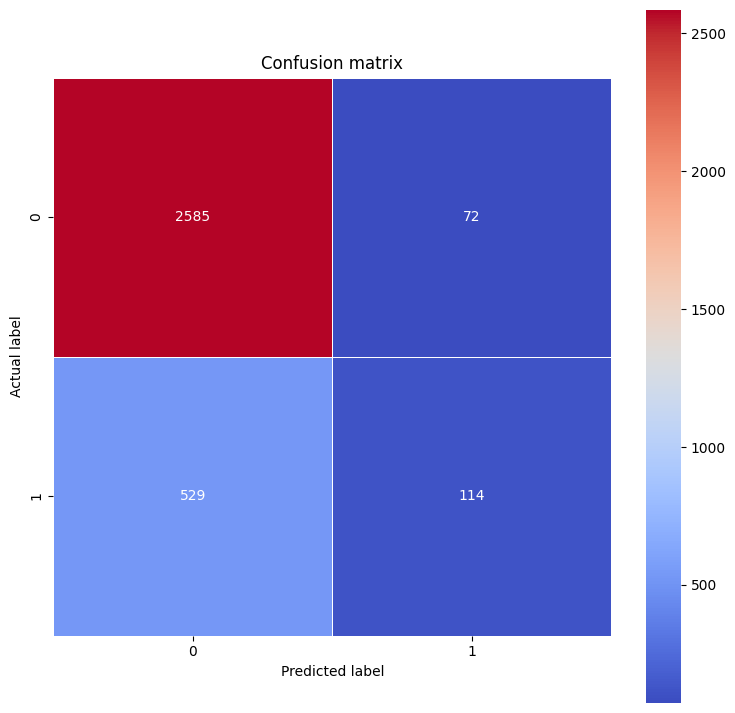

In [19]:
# Medir los resultados obtenidos usando una matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf_lin.predict(X_test))

#Visualizar la matriz de confusión
plt.figure(figsize=(9,9))
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, fmt='g', linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Metricas de éxito propuestas para evaluar el modelo, en todas se busca un valor cercano a 1
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Predecir resultados con los datos de prueba
prediction_test = clf_lin.predict(X_test)

# Exactitud: proporción de predicciones correctas.
print(f"Accuracy model: {accuracy_score(y_test, prediction_test):.3f}")

# Sensibilidad: capacidad del modelo de identificar todas las muestras positivas para un label.
print(f"Exited Churn='NO': {recall_score(y_test, prediction_test, pos_label=0):.3f}")
print(f"Exited Churn='YES': {recall_score(y_test, prediction_test, pos_label=1):.3f}")

# F1 Score: media armónica entre precisión y sensibilidad, nos da una mejor idea de que tan bien se comporta el modelo de forma global.
print(f"F1 Score: {f1_score(y_test, prediction_test):.3f}")
# En ocasiones, esta última metrica se usa en competiciones (Kaggle, DataDriven) para comparar modelos.


Accuracy model: 0.818
Exited Churn='NO': 0.973
Exited Churn='YES': 0.177
F1 Score: 0.275


## Exportación con pickle

In [21]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
#Tener en cuenta esta nota de la documentación de Python
#"Warning: The pickle module is not secure. Only unpickle data you trust."

pickle.dump(clf_lin, open("models/model.pk", "wb"))
pickle.dump(column_equivalence, open("models/column_equivalence.pk", "wb"))
pickle.dump(features, open("models/features.pk", "wb"))